In [1]:
from BLOCH_beamline import *

data_folder = Path('Data/')

%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)


---- BLOCH beamline ----
	Last updated 27.11.2018 

	Latest change: better HDF5 handling



In [3]:
scanSet = []

scanNames = HDF5getScanList(data_folder/"(18.11.23)_hpol_fundamental2.h5")
for scanName in scanNames:
    scanSet.append(HDF5loadscan(data_folder/"(18.11.23)_hpol_fundamental2.h5",scanName))

scanNames = HDF5getScanList(data_folder/"(18.11.23)_hpol_fundamental3.h5")
for scanName in scanNames:
    scanSet.append(HDF5loadscan(data_folder/"(18.11.23)_hpol_fundamental3.h5",scanName))

scanNames = HDF5getScanList(data_folder/"(18.11.23)_hpol_fundamental4.h5")
for scanName in scanNames:
    scanSet.append(HDF5loadscan(data_folder/"(18.11.23)_hpol_fundamental4.h5",scanName))



******************************** EPU gap 19 ********************************




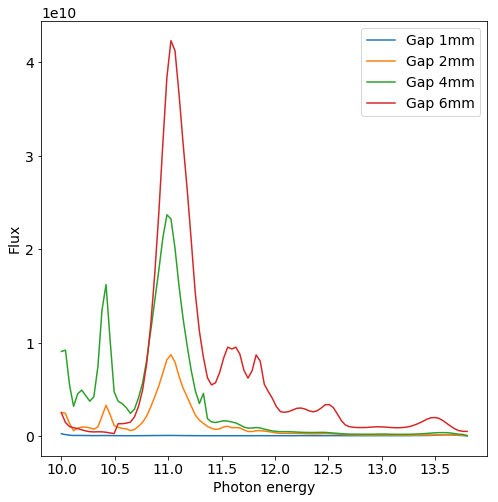



******************************** EPU gap 20 ********************************




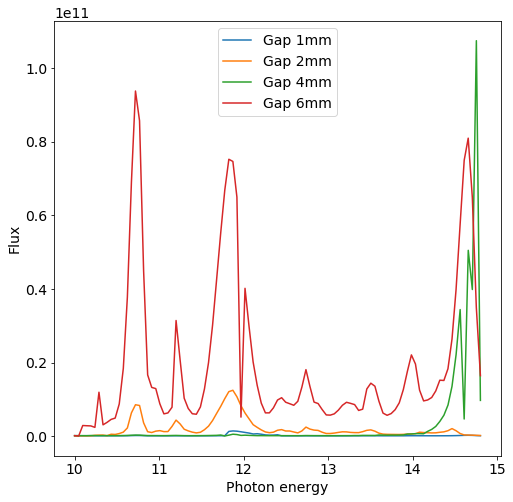



******************************** EPU gap 21 ********************************




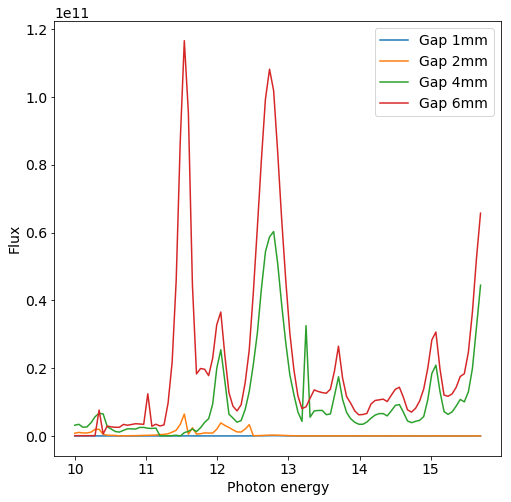



******************************** EPU gap 22 ********************************




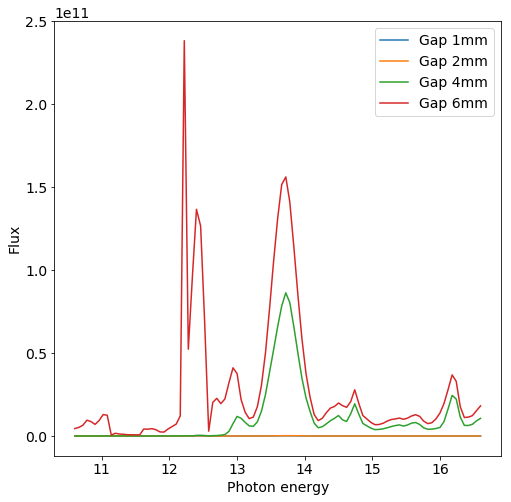



******************************** EPU gap 23 ********************************




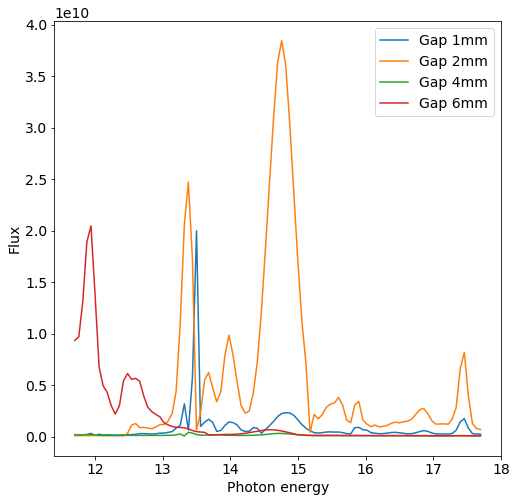



******************************** EPU gap 24 ********************************




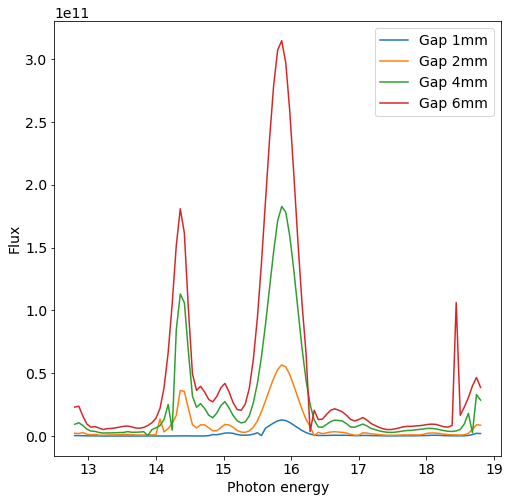



******************************** EPU gap 25 ********************************




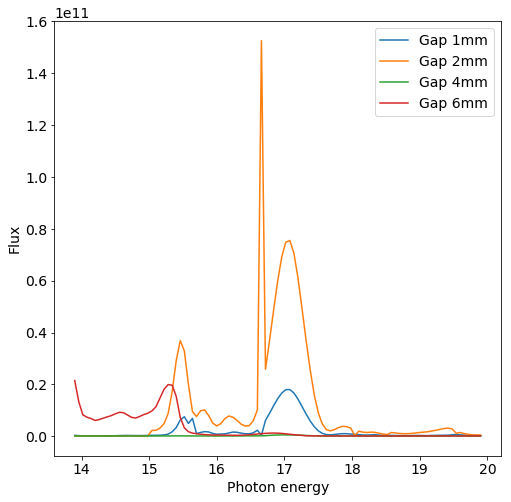



******************************** EPU gap 26 ********************************




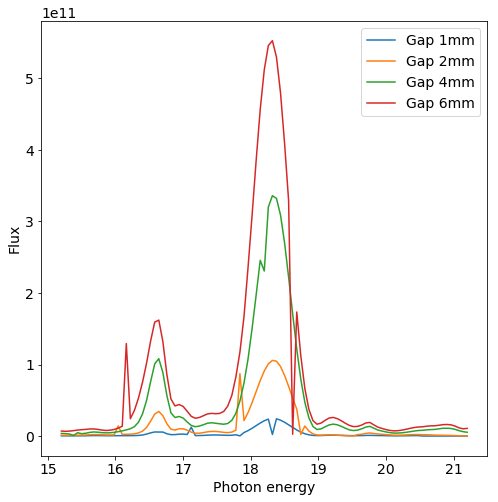



******************************** EPU gap 27 ********************************




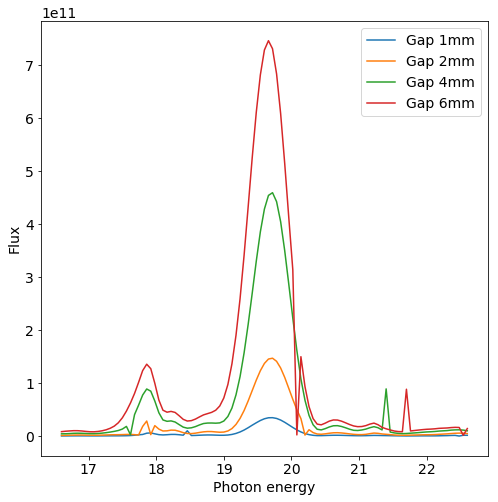



******************************** EPU gap 28 ********************************




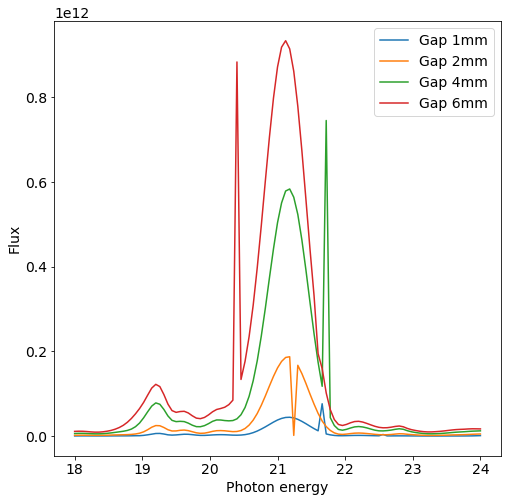



******************************** EPU gap 29 ********************************




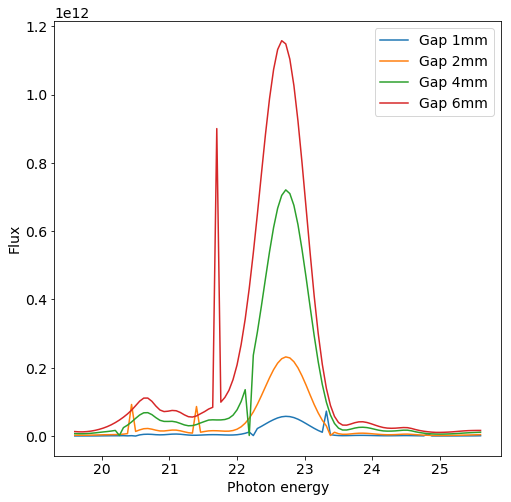



******************************** EPU gap 30 ********************************




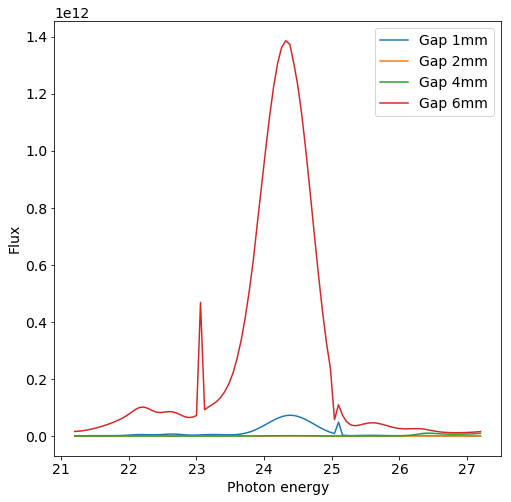



******************************** EPU gap 31 ********************************




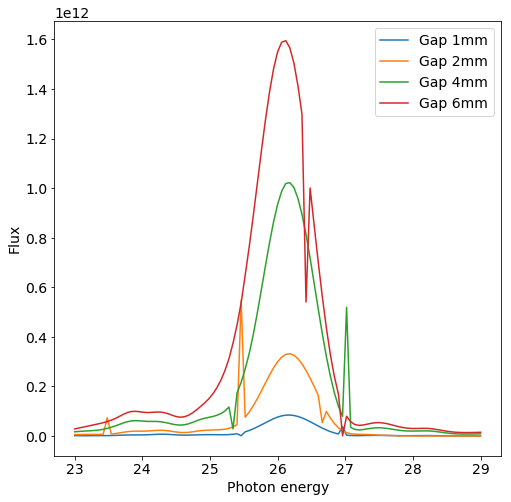



******************************** EPU gap 32 ********************************




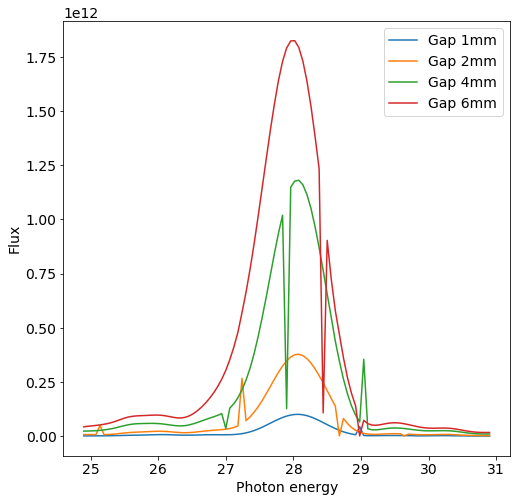



******************************** EPU gap 33 ********************************




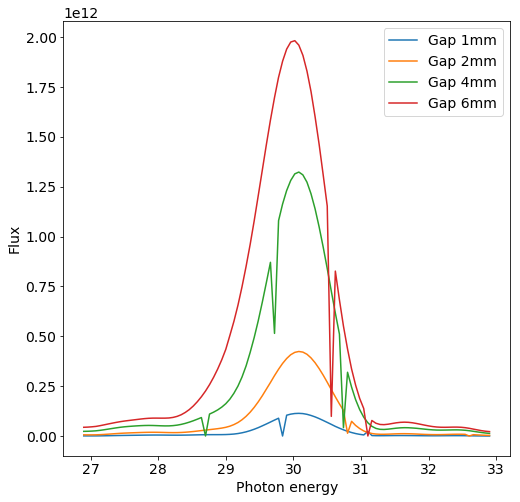



******************************** EPU gap 34 ********************************




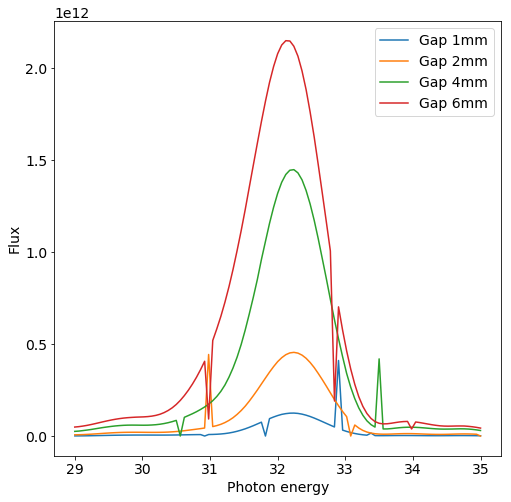



******************************** EPU gap 35 ********************************




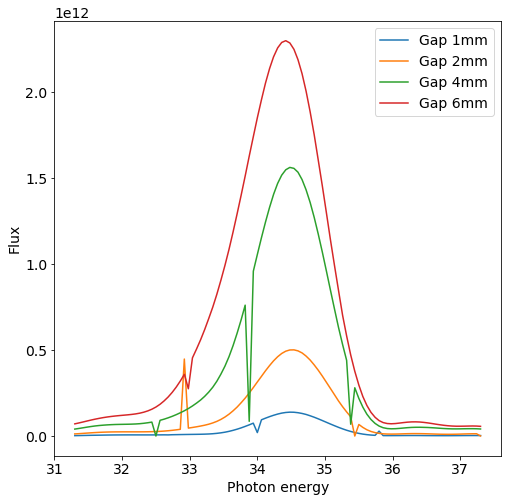



******************************** EPU gap 36 ********************************




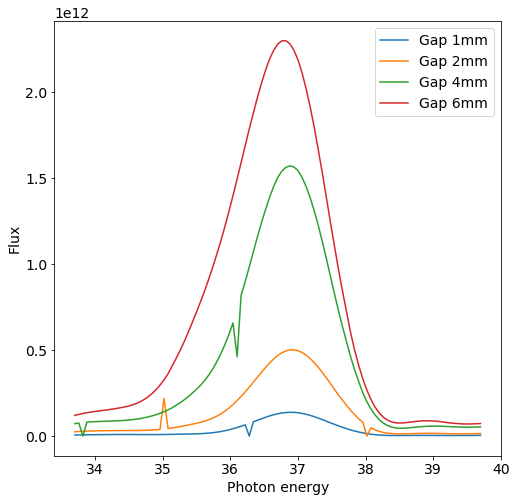



******************************** EPU gap 37 ********************************




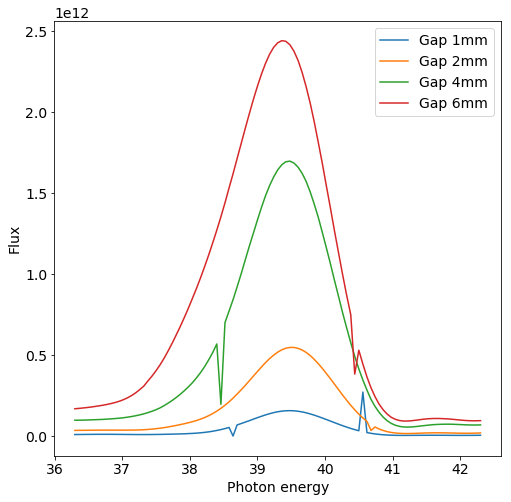



******************************** EPU gap 38 ********************************




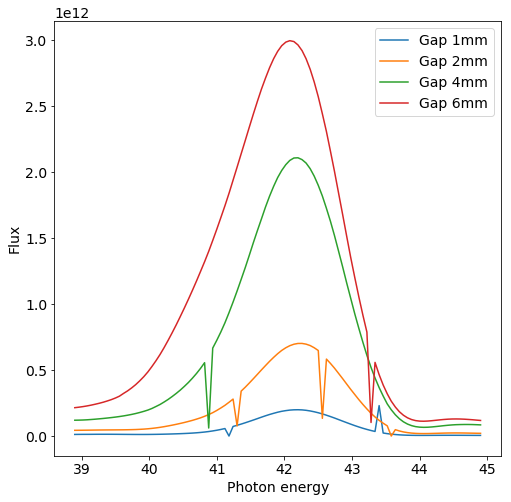



******************************** EPU gap 39 ********************************




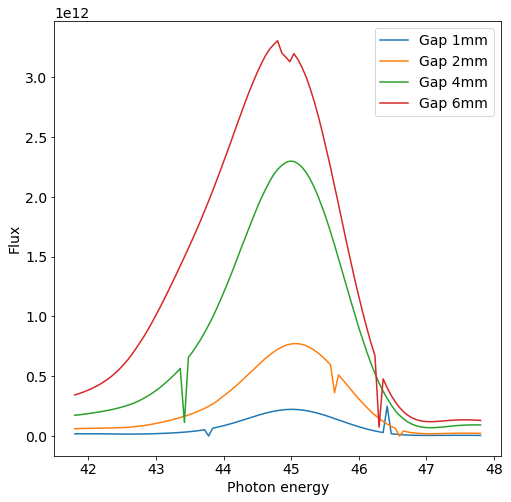



******************************** EPU gap 40 ********************************




KeyError: 'mono_energy'

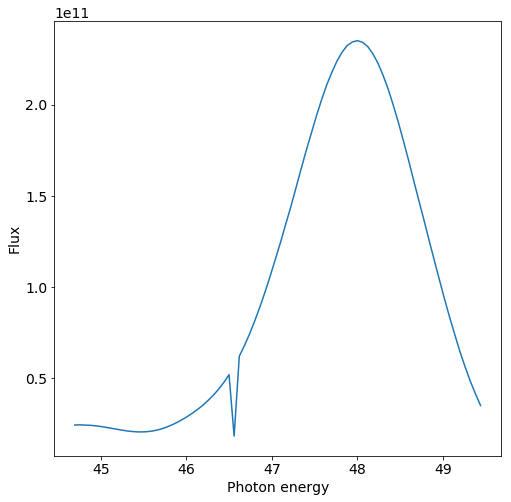

In [4]:
gaps = range(19,55)
lookupTable = 'vpol_gaps.txt'

for index,gap in enumerate(gaps):
    print("\n\n******************************** EPU gap {0} ********************************\n\n".format(gap))
    fig=plt.figure(figsize=[8,8])
    
    hv=lookupHarmonicEnergy(lookupTable,gap,1)
    plt.ylabel('Flux')
    plt.xlabel('Photon energy')
    #plt.yscale('log')
    baffleGap = 1
    scan=scanSet[index*4]
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm".format(baffleGap))
    
    baffleGap = 2
    scan=scanSet[(index*4)+1]
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm".format(baffleGap))
    
    baffleGap = 4
    scan=scanSet[(index*4)+2]
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm".format(baffleGap))
    
    baffleGap = 6
    scan=scanSet[(index*4)+3]
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm".format(baffleGap))   

    """
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    plt.plot([experiment_hv,experiment_hv],[0,experiment_flux],linestyle='--',color='grey')
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
 
    plt.xlim([experiment_hv-(4*hv/29),experiment_hv+(3*hv/29)])

    entryNumber+=1
    baffleGap = 5
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
    
    entryNumber+=1
    baffleGap = 8
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
    
    entryNumber+=1
    baffleGap = 11
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    plt.plot([experiment_hv,experiment_hv],[0,experiment_flux],linestyle='--',color='grey')
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
    """
    plt.legend()
    

    plt.show()

    

In [ ]:
dataFile=loadHDF5(data_folder/"(18.11.23)_hpol_fundamental.h5")

entryNumber = 2857
gaps = [n for n in range(22,50)]
lookupTable = 'vpol_gaps.txt'

for gap in gaps:
    print("\n\n******************************** EPU gap {0} ********************************\n\n".format(gap))
    fig=plt.figure(figsize=[15,6])
    fig.suptitle("EPU gap {0}mm, phase 42mm".format(gap))
    plt.subplot(1,2,1)
    plt.xlabel('Baffle v offset (mm)')
    plt.ylabel('Flux')
    hv=lookupHarmonicEnergy(lookupTable,gap,1)
    plt.title("Horizontal profile, hv={0:.2f}".format(hv))
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['mono_energy']=[hv for n in scan['diodeCurrent']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    
    params = Parameters()
    params.add('amplitude', 	value=3e9, vary=True)
    params.add('width', 	value=1,vary=True)
    params.add('center', 	value=0.65,vary=True)
    params.add('offset', 	value=2e10, min=0,vary=True)

    out = minimize(residual, params,args=(scan['mono_baff_v_offset'], scan['flux']),method='leastsq')

    fittedCurve=Gauss(out.params,scan['mono_baff_v_offset'])
    FWHM = 2*math.sqrt(2*math.log(2))*out.params['width'].value
    offset = out.params['center'].value
    plt.plot(scan['mono_baff_v_offset'],scan['flux'])
    plt.plot(scan['mono_baff_v_offset'],fittedCurve,label='FWHM: {0:.2f}\nOffset: {1:.2f}'.format(FWHM,offset))
    plt.legend()
    
   
    plt.subplot(1,2,2)
    print("Baffle gap (mm)\tPeak position (eV)\tPeak flux")
    print("----------------------------------------------")
    plt.ylabel('Flux')
    plt.xlabel('Photon energy')
    
    entryNumber+=1
    baffleGap = 2
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    plt.plot([experiment_hv,experiment_hv],[0,experiment_flux],linestyle='--',color='grey')
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
 
    plt.xlim([experiment_hv-(4*hv/29),experiment_hv+(3*hv/29)])

    entryNumber+=1
    baffleGap = 5
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
    
    entryNumber+=1
    baffleGap = 8
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
    
    entryNumber+=1
    baffleGap = 11
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    plt.plot([experiment_hv,experiment_hv],[0,experiment_flux],linestyle='--',color='grey')
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
    
    plt.legend()
    

    plt.show()
    
    entryNumber+=1

dataFile.close()

